# Part 1:  Use the state data (the state of your choice) generated in Stage II to fit a distribution to the number of COVID-19 new cases.

In [300]:
# Importing libraries

import pandas as pd
from datetime import datetime
import plotly.express as px
import matplotlib.pyplot as plt
import scipy.stats  as stats
import numpy as np
from IPython.display import Image
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import seaborn as sns
super_dataset = pd.read_csv('/Users/aditi/Documents/GitHub/Spring-22_COVID-Team_4/data/stage_1/superdataset.csv')

sns.set(color_codes=True, font_scale=1.2)

from heatmap import heatmap, corrplot


import warnings
warnings.filterwarnings('ignore')

## Using Florida State from stage 2 to fit the distribution

In [302]:
# Filtering data with county name which are not statewise unallocated and selecting Florida state from Super dataset
florida_data = super_dataset[super_dataset["State"] == "FL"]
florida_data = florida_data[florida_data['County_Name'] != 'statewide unallocated']
florida_data.head()

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population
249161,12001,alachua county,FL,1/22/20,0,0,269043
249162,12001,alachua county,FL,1/23/20,0,0,269043
249163,12001,alachua county,FL,1/24/20,0,0,269043
249164,12001,alachua county,FL,1/25/20,0,0,269043
249165,12001,alachua county,FL,1/26/20,0,0,269043


In [303]:
# Calculating Difference by date to get confirmed and death cases
florida_data['new cases'] = florida_data['Confirmed'].diff()
florida_data['num deaths'] = florida_data['Deaths'].diff()
florida_data.head()

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,new cases,num deaths
249161,12001,alachua county,FL,1/22/20,0,0,269043,NaN,NaN
249162,12001,alachua county,FL,1/23/20,0,0,269043,0,0
249163,12001,alachua county,FL,1/24/20,0,0,269043,0,0
249164,12001,alachua county,FL,1/25/20,0,0,269043,0,0
249165,12001,alachua county,FL,1/26/20,0,0,269043,0,0


In [305]:
# Remove first row as we have got NaN value for the diff() function. Conver date to correct format for further analysis.

florida_data= florida_data[florida_data['Date'] != '1/22/20']
fl_groupby_date = florida_data.groupby(["Date"]).sum().reset_index()
fl_groupby_date = fl_groupby_date.drop(['County_Name','State'], axis=1) 

fl_groupby_date.head()

,Date,countyFIPS,Confirmed,Deaths,population,new cases,num deaths
0,1/1/21,808550,1320305,21670,21477737,0,-3
1,1/1/22,808550,4166387,36973,21477737,0,0
2,1/10/21,808550,1473840,22912,21477737,12309,108
3,1/10/22,808550,4562952,36973,21477737,0,0
4,1/11/21,808550,1485410,23071,21477737,11570,159


##  Calculating Daily new and Daily new death cases normalized by population (per 1000000 persons)

In [306]:
# using groupby date and sum the new cases and deaths across State 
fl_groupby_date['confirmed_normalized'] = round((fl_groupby_date['new cases']/fl_groupby_date['population'])*1000000).astype(int)
fl_groupby_date['deaths_normalized'] = round((fl_groupby_date['num deaths']/fl_groupby_date['population'])*1000000).astype(int)
fl_groupby_date.head()

,Date,countyFIPS,Confirmed,Deaths,population,new cases,num deaths,confirmed_normalized,deaths_normalized
0,1/1/21,808550,1320305,21670,21477737,0,-3,0,0
1,1/1/22,808550,4166387,36973,21477737,0,0,0,0
2,1/10/21,808550,1473840,22912,21477737,12309,108,573,5
3,1/10/22,808550,4562952,36973,21477737,0,0,0,0
4,1/11/21,808550,1485410,23071,21477737,11570,159,539,7


In [307]:
# Calculate the mean of confirmed cases
data_mean_values = fl_groupby_date['confirmed_normalized'].mean()
data_mean_values

349.70013386880856

#### Calculate the Probability Mean function using the mean of confirmed normalized cases.

In [308]:
fl_groupby_date['PMF'] = stats.poisson.pmf(k=fl_groupby_date['confirmed_normalized'], mu=data_mean_values)
fl_groupby_date.head()

,Date,countyFIPS,Confirmed,Deaths,population,new cases,num deaths,confirmed_normalized,deaths_normalized,PMF
0,1/1/21,808550,1320305,21670,21477737,0,-3,0,0,1.340175e-152
1,1/1/22,808550,4166387,36973,21477737,0,0,0,0,1.340175e-152
2,1/10/21,808550,1473840,22912,21477737,12309,108,573,5,2.064256e-28
3,1/10/22,808550,4562952,36973,21477737,0,0,0,0,1.340175e-152
4,1/11/21,808550,1485410,23071,21477737,11570,159,539,7,1.488082e-21


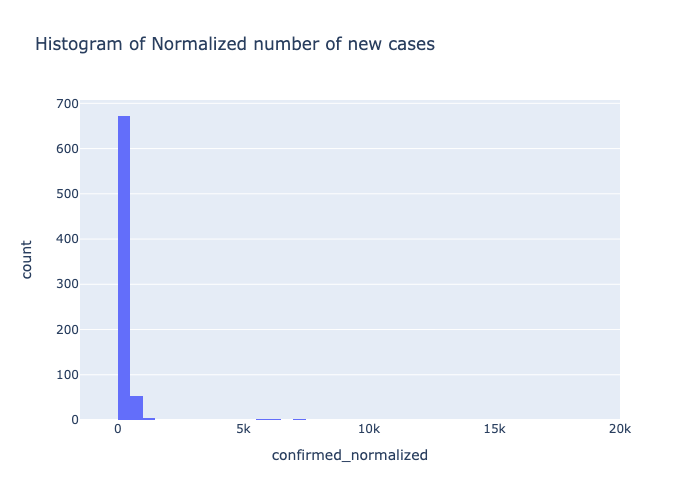

In [309]:
fig = px.histogram(fl_groupby_date, x="confirmed_normalized",nbins=60,title='Histogram of Normalized number of new cases')
#display plot
fig.write_image("graphs/Histogram of Normalized number of new cases.png")
Image(filename="graphs/Histogram of Normalized number of new cases.png")

The distribution I am choosing Poisson distribution because the data we can see in the graph is having posiive values 
and data is discrete. We can observe a covid cases in certain period and time interval

The data is positive-valued, since we are measuring number of covid-19 cases per day.
The data is discrete<br>
The data gives the number of covid-19 cases observed in period or time interval of a day
We know that the Poisson distribution models the probability of seeing a certain number of successes within a time
interval. 
So we will be using Poisson distrubution for our data.

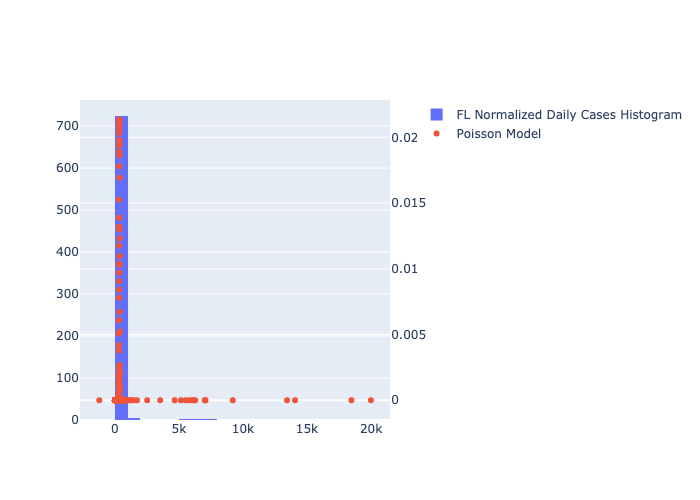

In [311]:
# Calculate the pmf values using the poission distribution and plot
fig = go.Figure()
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Histogram(x=fl_groupby_date["confirmed_normalized"],nbinsx=40,name="FL Normalized Daily Cases Histogram"))
fig.add_trace(go.Scatter(x=fl_groupby_date["confirmed_normalized"], y=fl_groupby_date["PMF"],mode='markers', name="Poisson Model"), secondary_y=True)
#display plot
fig.write_image("graphs/FL Normalized Daily Cases Histogram.png")
Image(filename="graphs/FL Normalized Daily Cases Histogram.png")

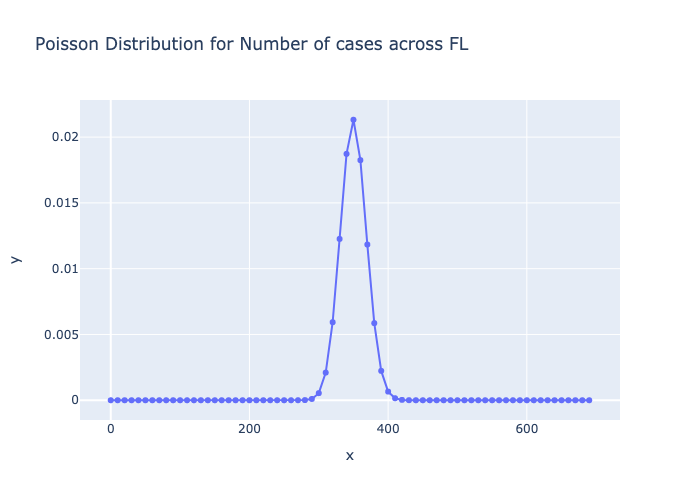

In [312]:
fig = px.scatter(fl_groupby_date, x=range(0,700,10), y=stats.poisson.pmf(k=range(0,700,10),mu=350),title='Poisson Distribution for Number of cases across FL')
fig.update_traces(mode='lines+markers')
#display plot
fig.write_image("graphs/FL_distribution.png")
Image(filename="graphs/FL_distribution.png")

### statistics for Florida state

#### Measure of center

In [313]:
fl_groupby_date['confirmed_normalized'].mean()

349.70013386880856

#### Variance

In [314]:
#variance
fl_groupby_date['confirmed_normalized'].var()

2094522.2852948827

#### skewnes

In [315]:
fl_groupby_date['confirmed_normalized'].skew()

9.332742670548248

#### kurtosis

In [141]:
fl_groupby_date['confirmed_normalized'].kurt()

101.54114949873116

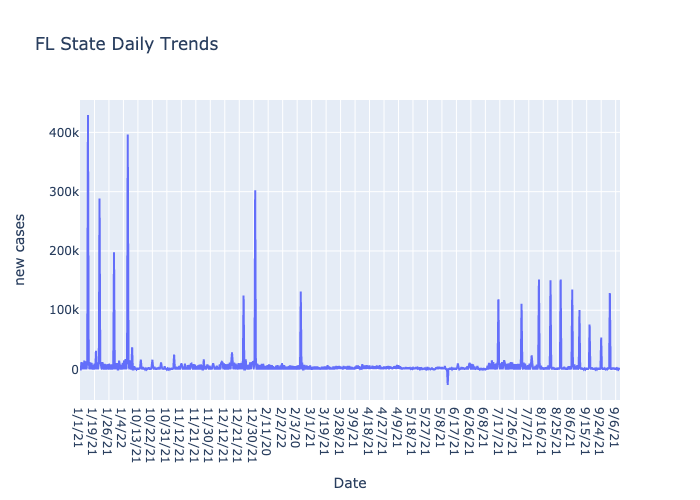

In [142]:
#make plot of state daily trends
fig = px.line(fl_groupby_date, x = "Date", y = "new cases", title ='FL State Daily Trends')
#display plot
fig.write_image("graphs/FL State Daily Trends.png")
Image(filename="graphs/FL State Daily Trends.png")

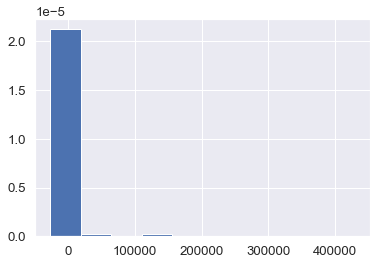

In [143]:
#display histogram of the FL state cases
plt.hist(fl_groupby_date['new cases'], density = True)
#display plot
plt.show()

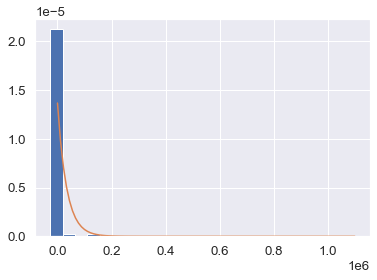

In [144]:
#display histogram of fitted data
fitted_data = stats.expon.fit(fl_groupby_date['new cases'])

a = np.linspace(0, 1100000, 100)
b = stats.expon.pdf(a, *fitted_data)

plt.hist(fl_groupby_date['new cases'], density = True)

plt.plot(a, b)
plt.show()

### Calculating statistics for GA State

In [316]:

ga_data = super_dataset[super_dataset["State"] == "GA"]
ga_data = ga_data[ga_data['County_Name'] != 'statewide unallocated']
ga_data.head()

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population
300025,13001,appling county,GA,1/22/20,0,0,18386
300026,13001,appling county,GA,1/23/20,0,0,18386
300027,13001,appling county,GA,1/24/20,0,0,18386
300028,13001,appling county,GA,1/25/20,0,0,18386
300029,13001,appling county,GA,1/26/20,0,0,18386


In [154]:
ga_data['new cases'] = ga_data['Confirmed'].diff()
ga_data['new deaths'] = ga_data['Deaths'].diff()
ga_data.head()

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,new cases,new deaths
300025,13001,appling county,GA,1/22/20,0,0,18386,NaN,NaN
300026,13001,appling county,GA,1/23/20,0,0,18386,0,0
300027,13001,appling county,GA,1/24/20,0,0,18386,0,0
300028,13001,appling county,GA,1/25/20,0,0,18386,0,0
300029,13001,appling county,GA,1/26/20,0,0,18386,0,0


In [159]:
# Remove first row as we have got NaN value for the diff() function. Conver date to correct format for further analysis.

ga_data= ga_data[ga_data['Date'] != '1/22/20']
ga_groupby_date = ga_data.groupby(["Date"]).sum().reset_index()
ga_groupby_date = ga_groupby_date.drop(['County_Name','State'], axis=1) 

ga_groupby_date.head()

,Date,countyFIPS,Confirmed,Deaths,population,new cases,new deaths
0,1/1/21,2092677,550372,9627,10617423,8438,16
1,1/1/22,2092677,1379528,30276,10617423,0,0
2,1/10/21,2092677,608623,10007,10617423,6717,2
3,1/10/22,2092677,1524434,30498,10617423,75307,153
4,1/11/21,2092677,614796,10024,10617423,6173,17


In [160]:
ga_groupby_date['confirmed_normalized'] = round((ga_groupby_date['new cases']/ga_groupby_date['population'])*1000000).astype(int)
ga_groupby_date['deaths_normalized'] = round((ga_groupby_date['new deaths']/ga_groupby_date['population'])*1000000).astype(int)
ga_groupby_date.head()

,Date,countyFIPS,Confirmed,Deaths,population,new cases,new deaths,confirmed_normalized,deaths_normalized
0,1/1/21,2092677,550372,9627,10617423,8438,16,795,2
1,1/1/22,2092677,1379528,30276,10617423,0,0,0,0
2,1/10/21,2092677,608623,10007,10617423,6717,2,633,0
3,1/10/22,2092677,1524434,30498,10617423,75307,153,7093,14
4,1/11/21,2092677,614796,10024,10617423,6173,17,581,2


In [161]:
ga_groupby_date['confirmed_normalized'].mean()

227.73493975903614

In [164]:
ga_groupby_date['confirmed_normalized'].var()

199073.80364352925

In [165]:
ga_groupby_date['confirmed_normalized'].skew()

8.012044415617886

In [168]:
ga_groupby_date['confirmed_normalized'].kurt()

97.58858466264165

### Calculating statistics for CA State

In [170]:
ca_data = super_dataset[super_dataset["State"] == "CA"]
ca_data = ca_data[ca_data['County_Name'] != 'statewide unallocated']
ca_data.head()

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population
148929,6001,alameda county,CA,1/22/20,4,0,1671329
148930,6001,alameda county,CA,1/23/20,4,0,1671329
148931,6001,alameda county,CA,1/24/20,4,0,1671329
148932,6001,alameda county,CA,1/25/20,5,0,1671329
148933,6001,alameda county,CA,1/26/20,5,0,1671329


In [171]:
ca_data['new cases'] = ca_data['Confirmed'].diff()
ca_data['new deaths'] = ca_data['Deaths'].diff()
ca_data.head()

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,new cases,new deaths
148929,6001,alameda county,CA,1/22/20,4,0,1671329,NaN,NaN
148930,6001,alameda county,CA,1/23/20,4,0,1671329,0,0
148931,6001,alameda county,CA,1/24/20,4,0,1671329,0,0
148932,6001,alameda county,CA,1/25/20,5,0,1671329,1,0
148933,6001,alameda county,CA,1/26/20,5,0,1671329,0,0


In [172]:
# Remove first row as we have got NaN value for the diff() function. Conver date to correct format for further analysis.

ca_data= ca_data[ca_data['Date'] != '1/22/20']
ca_groupby_date = ca_data.groupby(["Date"]).sum().reset_index()
ca_groupby_date = ca_groupby_date.drop(['County_Name','State'], axis=1) 

ca_groupby_date.head()

,Date,countyFIPS,Confirmed,Deaths,population,new cases,new deaths
0,1/1/21,345289,2490625,32916,38630674,35350,632
1,1/1/22,345289,5368286,75056,38630674,45710,98
2,1/10/21,345289,2850522,38969,38630674,28278,676
3,1/10/22,345289,6209449,75883,38630674,67909,100
4,1/11/21,345289,2869186,39633,38630674,18664,664


In [173]:
ca_groupby_date['confirmed_normalized'] = round((ca_groupby_date['new cases']/ca_groupby_date['population'])*1000000).astype(int)
ca_groupby_date['deaths_normalized'] = round((ca_groupby_date['new deaths']/ca_groupby_date['population'])*1000000).astype(int)
ca_groupby_date.head()

,Date,countyFIPS,Confirmed,Deaths,population,new cases,new deaths,confirmed_normalized,deaths_normalized
0,1/1/21,345289,2490625,32916,38630674,35350,632,915,16
1,1/1/22,345289,5368286,75056,38630674,45710,98,1183,3
2,1/10/21,345289,2850522,38969,38630674,28278,676,732,17
3,1/10/22,345289,6209449,75883,38630674,67909,100,1758,3
4,1/11/21,345289,2869186,39633,38630674,18664,664,483,17


In [174]:
ca_groupby_date['confirmed_normalized'].mean()

275.4457831325301

In [175]:
ca_groupby_date['confirmed_normalized'].var()

419471.53693594807

In [176]:
ca_groupby_date['confirmed_normalized'].skew()

7.4877146745629375

In [177]:
ca_groupby_date['confirmed_normalized'].kurt()

73.86678045308044

### Calculating statistics for KY State

In [178]:
ky_data = super_dataset[super_dataset["State"] == "KY"]
ky_data = ky_data[ky_data['County_Name'] != 'statewide unallocated']
ky_data.head()

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population
757801,21001,adair county,KY,1/22/20,0,0,19202
757802,21001,adair county,KY,1/23/20,0,0,19202
757803,21001,adair county,KY,1/24/20,0,0,19202
757804,21001,adair county,KY,1/25/20,0,0,19202
757805,21001,adair county,KY,1/26/20,0,0,19202


In [179]:
ky_data['new cases'] = ky_data['Confirmed'].diff()
ky_data['new deaths'] = ky_data['Deaths'].diff()
ky_data.head()

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,new cases,new deaths
757801,21001,adair county,KY,1/22/20,0,0,19202,NaN,NaN
757802,21001,adair county,KY,1/23/20,0,0,19202,0,0
757803,21001,adair county,KY,1/24/20,0,0,19202,0,0
757804,21001,adair county,KY,1/25/20,0,0,19202,0,0
757805,21001,adair county,KY,1/26/20,0,0,19202,0,0


In [180]:
# Remove first row as we have got NaN value for the diff() function. Conver date to correct format for further analysis.

ky_data= ky_data[ky_data['Date'] != '1/22/20']
ky_groupby_date = ky_data.groupby(["Date"]).sum().reset_index()
ky_groupby_date = ky_groupby_date.drop(['County_Name','State'], axis=1) 

ky_groupby_date.head()

,Date,countyFIPS,Confirmed,Deaths,population,new cases,new deaths
0,1/1/21,2534400,265261,2622,4467673,0,0
1,1/1/22,2534400,856136,12118,4467673,0,0
2,1/10/21,2534400,303619,2901,4467673,3223,25
3,1/10/22,2534400,932544,12425,4467673,16671,67
4,1/11/21,2534400,305684,2922,4467673,2065,21


In [181]:
ky_groupby_date['confirmed_normalized'] = round((ky_groupby_date['new cases']/ky_groupby_date['population'])*1000000).astype(int)
ky_groupby_date['deaths_normalized'] = round((ky_groupby_date['new deaths']/ky_groupby_date['population'])*1000000).astype(int)
ky_groupby_date.head()

,Date,countyFIPS,Confirmed,Deaths,population,new cases,new deaths,confirmed_normalized,deaths_normalized
0,1/1/21,2534400,265261,2622,4467673,0,0,0,0
1,1/1/22,2534400,856136,12118,4467673,0,0,0,0
2,1/10/21,2534400,303619,2901,4467673,3223,25,721,6
3,1/10/22,2534400,932544,12425,4467673,16671,67,3731,15
4,1/11/21,2534400,305684,2922,4467673,2065,21,462,5


In [182]:
ky_groupby_date['confirmed_normalized'].mean()

359.3480589022758

In [183]:
ky_groupby_date['confirmed_normalized'].var()

472831.98056928563

In [184]:
ky_groupby_date['confirmed_normalized'].skew()

5.469246260480908

In [185]:
ky_groupby_date['confirmed_normalized'].kurt()

45.836615177011375

### Calculating statistics for MI State

In [186]:
mi_data = super_dataset[super_dataset["State"] == "MI"]
mi_data = mi_data[mi_data['County_Name'] != 'statewide unallocated']
mi_data.head()

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population
938069,26001,alcona county,MI,1/22/20,0,0,10405
938070,26001,alcona county,MI,1/23/20,0,0,10405
938071,26001,alcona county,MI,1/24/20,0,0,10405
938072,26001,alcona county,MI,1/25/20,0,0,10405
938073,26001,alcona county,MI,1/26/20,0,0,10405


In [187]:
mi_data['new cases'] = mi_data['Confirmed'].diff()
mi_data['new deaths'] = mi_data['Deaths'].diff()
mi_data.head()

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,new cases,new deaths
938069,26001,alcona county,MI,1/22/20,0,0,10405,NaN,NaN
938070,26001,alcona county,MI,1/23/20,0,0,10405,0,0
938071,26001,alcona county,MI,1/24/20,0,0,10405,0,0
938072,26001,alcona county,MI,1/25/20,0,0,10405,0,0
938073,26001,alcona county,MI,1/26/20,0,0,10405,0,0


In [188]:
# Remove first row as we have got NaN value for the diff() function. Conver date to correct format for further analysis.

mi_data= mi_data[mi_data['Date'] != '1/22/20']
mi_groupby_date = mi_data.groupby(["Date"]).sum().reset_index()
mi_groupby_date = mi_groupby_date.drop(['County_Name','State'], axis=1) 

mi_groupby_date.head()

,Date,countyFIPS,Confirmed,Deaths,population,new cases,new deaths
0,1/1/21,2164889,504811,12876,9986857,0,0
1,1/1/22,2164889,1677250,28816,9986857,0,0
2,1/10/21,2164889,536838,13997,9986857,0,0
3,1/10/22,2164889,1869514,29809,9986857,48656,59
4,1/11/21,2164889,541985,14043,9986857,5147,46


In [189]:
mi_groupby_date['confirmed_normalized'] = round((mi_groupby_date['new cases']/mi_groupby_date['population'])*1000000).astype(int)
mi_groupby_date['deaths_normalized'] = round((mi_groupby_date['new deaths']/mi_groupby_date['population'])*1000000).astype(int)
mi_groupby_date.head()

,Date,countyFIPS,Confirmed,Deaths,population,new cases,new deaths,confirmed_normalized,deaths_normalized
0,1/1/21,2164889,504811,12876,9986857,0,0,0,0
1,1/1/22,2164889,1677250,28816,9986857,0,0,0,0
2,1/10/21,2164889,536838,13997,9986857,0,0,0,0
3,1/10/22,2164889,1869514,29809,9986857,48656,59,4872,6
4,1/11/21,2164889,541985,14043,9986857,5147,46,515,5


In [190]:
mi_groupby_date['confirmed_normalized'].mean()

303.38286479250337

In [191]:
mi_groupby_date['confirmed_normalized'].var()

518015.250000895

In [192]:
mi_groupby_date['confirmed_normalized'].skew()

6.128540186999941

In [193]:
mi_groupby_date['confirmed_normalized'].kurt()

55.37043612792914

### Calculating statistics for IL State

In [194]:
il_data = super_dataset[super_dataset["State"] == "IL"]
il_data = il_data[il_data['County_Name'] != 'statewide unallocated']
il_data.head()

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population
457105,17001,adams county,IL,1/22/20,0,0,65435
457106,17001,adams county,IL,1/23/20,0,0,65435
457107,17001,adams county,IL,1/24/20,0,0,65435
457108,17001,adams county,IL,1/25/20,0,0,65435
457109,17001,adams county,IL,1/26/20,0,0,65435


In [195]:
il_data['new cases'] = il_data['Confirmed'].diff()
il_data['new deaths'] = il_data['Deaths'].diff()
il_data.head()

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,new cases,new deaths
457105,17001,adams county,IL,1/22/20,0,0,65435,NaN,NaN
457106,17001,adams county,IL,1/23/20,0,0,65435,0,0
457107,17001,adams county,IL,1/24/20,0,0,65435,0,0
457108,17001,adams county,IL,1/25/20,0,0,65435,0,0
457109,17001,adams county,IL,1/26/20,0,0,65435,0,0


In [196]:
# Remove first row as we have got NaN value for the diff() function. Conver date to correct format for further analysis.

il_data= il_data[il_data['Date'] != '1/22/20']
il_groupby_date = il_data.groupby(["Date"]).sum().reset_index()
il_groupby_date = il_groupby_date.drop(['County_Name','State'], axis=1) 

il_groupby_date.head()

,Date,countyFIPS,Confirmed,Deaths,population,new cases,new deaths
0,1/1/21,1744404,970417,18170,12671821,7192,192
1,1/1/22,1744404,2203095,30763,12671821,22348,26
2,1/10/21,1744404,1028623,19293,12671821,4713,84
3,1/10/22,1744404,2459926,31388,12671821,19159,34
4,1/11/21,1744404,1033401,19362,12671821,4778,69


In [197]:
il_groupby_date['confirmed_normalized'] = round((il_groupby_date['new cases']/il_groupby_date['population'])*1000000).astype(int)
il_groupby_date['deaths_normalized'] = round((il_groupby_date['new deaths']/il_groupby_date['population'])*1000000).astype(int)
il_groupby_date.head()

,Date,countyFIPS,Confirmed,Deaths,population,new cases,new deaths,confirmed_normalized,deaths_normalized
0,1/1/21,1744404,970417,18170,12671821,7192,192,568,15
1,1/1/22,1744404,2203095,30763,12671821,22348,26,1764,2
2,1/10/21,1744404,1028623,19293,12671821,4713,84,372,7
3,1/10/22,1744404,2459926,31388,12671821,19159,34,1512,3
4,1/11/21,1744404,1033401,19362,12671821,4778,69,377,5


In [198]:
il_groupby_date['confirmed_normalized'].mean()

313.87951807228916

In [199]:
il_groupby_date['confirmed_normalized'].var()

215980.9318453437

In [200]:
il_groupby_date['confirmed_normalized'].skew()

3.4493967285512097

In [201]:
il_groupby_date['confirmed_normalized'].kurt()

15.524693137110479

FLORIDA STATE 
* MEAN = 349.700
* VARIANCE = 2094522.28 
* SKEWNESS = 9.332 
* KURTOSIS = 101.541

GEOGRGIA STATE 
* MEAN = 227.73493975903614
* VARIANCE = 199073.803
* SKEWNESS = 8.012 
* KURTOSIS = 97.588

CALIFORNIA STATE 
* MEAN = 275.445
* VARIANCE = 419471.536 
* SKEWNESS =7.487 
* KURTOSIS = 73.866

KENTUCKY STATE 
* MEAN = 359.348
* VARIANCE = 472831.980
* SKEWNESS = 5.469 
* KURTOSIS = 45.836

MICHIGAN STATE 
* MEAN = 303.382
* VARIANCE = 518015.250 
* SKEWNESS = 6.128
* KURTOSIS = 55.370

ILLINOIS STATE
* MEAN = 313.879
* VARIANCE = 215980.931
* SKEWNESS = 3.449
* KURTOSIS = 15.524

## Part 2 - Model a poission distribution of new COVID-19 cases and deaths of a state and compare to other 5 states

## I am choosing state  Florida(FL) for covid new case analysis and compared against GA, CA, KY and MI

#### Weekly data of 5 other states

In [85]:
#Filter data for comparing states FL 

covid_merged_subset = super_dataset[super_dataset["State"].isin(['FL','GA','CA','KY','MI'])]
covid_merged_subset.head()

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population
148181,0,statewide unallocated,CA,1/22/20,0,0,0
148182,0,statewide unallocated,CA,1/23/20,0,0,0
148183,0,statewide unallocated,CA,1/24/20,0,0,0
148184,0,statewide unallocated,CA,1/25/20,0,0,0
148185,0,statewide unallocated,CA,1/26/20,0,0,0


In [86]:
# Remove first row as we have got NaN value for the diff() function. Conver date to correct format for further analysis.

covid_merged_subset = covid_merged_subset[covid_merged_subset['County_Name'] != 'statewide unallocated']
covid_merged_subset['Date'] = covid_merged_subset.Date.apply(lambda d: datetime.strptime(d, '%m/%d/%y'))
covid_merged_subset.head()

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population
148929,6001,alameda county,CA,2020-01-22,4,0,1671329
148930,6001,alameda county,CA,2020-01-23,4,0,1671329
148931,6001,alameda county,CA,2020-01-24,4,0,1671329
148932,6001,alameda county,CA,2020-01-25,5,0,1671329
148933,6001,alameda county,CA,2020-01-26,5,0,1671329


In [87]:
# use groupby date and State and sum the new cases and deaths across State 
other_states_data_groupedByState = covid_merged_subset.groupby(["Date","State"]).sum().reset_index()
other_states_data_groupedByState.head()

,Date,State,countyFIPS,County_Name,Confirmed,Deaths,population
0,2020-01-22,CA,345289,alameda countyalpine countyamador countybutte ...,711,0,38630674
1,2020-01-22,FL,808550,alachua countybaker countybay countybradford c...,0,0,21477737
2,2020-01-22,GA,2092677,appling countyatkinson countybacon countybaker...,0,0,10617423
3,2020-01-22,KY,2534400,adair countyallen countyanderson countyballard...,0,0,4467673
4,2020-01-22,MI,2164889,alcona countyalger countyallegan countyalpena ...,0,0,9986857


In [88]:
# use groupby date and State and sum the new cases and deaths across State 
other_states_data_groupedByState = covid_merged_subset.groupby(["State","Date"]).sum().reset_index()
other_states_data_groupedByState = other_states_data_groupedByState.drop(['County_Name'], axis=1) 
other_states_data_groupedByState.head()

,State,Date,countyFIPS,Confirmed,Deaths,population
0,CA,2020-01-22,345289,711,0,38630674
1,CA,2020-01-23,345289,722,0,38630674
2,CA,2020-01-24,345289,728,0,38630674
3,CA,2020-01-25,345289,738,0,38630674
4,CA,2020-01-26,345289,745,0,38630674


In [89]:
#take the diffenece of the columns to get the new cases and deaths
other_states_data_groupedByState['Confirmed'] = other_states_data_groupedByState['Confirmed'].diff()
other_states_data_groupedByState['Deaths'] = other_states_data_groupedByState['Deaths'].diff()
other_states_data_groupedByState.head()

,State,Date,countyFIPS,Confirmed,Deaths,population
0,CA,2020-01-22,345289,NaN,NaN,38630674
1,CA,2020-01-23,345289,11.0,0.0,38630674
2,CA,2020-01-24,345289,6.0,0.0,38630674
3,CA,2020-01-25,345289,10.0,0.0,38630674
4,CA,2020-01-26,345289,7.0,0.0,38630674


In [90]:
other_states_data_groupedByState= other_states_data_groupedByState[other_states_data_groupedByState['Date'] != '2020-01-22']
data = other_states_data_groupedByState
data.head()

,State,Date,countyFIPS,Confirmed,Deaths,population
1,CA,2020-01-23,345289,11.0,0.0,38630674
2,CA,2020-01-24,345289,6.0,0.0,38630674
3,CA,2020-01-25,345289,10.0,0.0,38630674
4,CA,2020-01-26,345289,7.0,0.0,38630674
5,CA,2020-01-27,345289,10.0,0.0,38630674


In [91]:
#normalize the new cases and deaths per day by population of 100000
data['confirmed (Normalized)']= (data['Confirmed']/data['population'])*100000
data['deaths (Normalized)']= (data['Deaths']/data['population'])*100000

#remove unneeded columns
data = data[['Date', 'State', 'confirmed (Normalized)', 'deaths (Normalized)']]

#display dataset
data.head()



,Date,State,confirmed (Normalized),deaths (Normalized)
1,2020-01-23,CA,0.028475,0.0
2,2020-01-24,CA,0.015532,0.0
3,2020-01-25,CA,0.025886,0.0
4,2020-01-26,CA,0.018120,0.0
5,2020-01-27,CA,0.025886,0.0


In [92]:
#group by state and compute mean of each column for each state
data = data.groupby(['State'])['confirmed (Normalized)','deaths (Normalized)'].agg({'confirmed (Normalized)':'mean','deaths (Normalized)' :'mean'}).reset_index()

#display dataset
data

,State,confirmed (Normalized),deaths (Normalized)
0,CA,27.544359,0.275537
1,FL,34.968921,0.230449
2,GA,22.774178,0.406445
3,KY,35.934690,0.394205
4,MI,30.338723,0.438273


#### Calculate the pmf values using poisson distribution: cases

In [93]:
# Added a fuction to calculate the k_values and probablity using poisson distribution

k_values = range(40,170,10)
states = data['State']
means = data['confirmed (Normalized)']
columns = ['state','mean','k_value','probability']

data_dict={}
for column in columns:
    data_dict[column]=[]
        
for idx, mean in enumerate(means):
    for k_value in k_values:
        data_dict['state'].append(states[idx])
        data_dict['mean'].append(mean)
        data_dict['k_value'].append(k_value)
        data_dict['probability'].append(stats.poisson.pmf(k=k_value,mu=mean))
poisson_data_cases=pd.DataFrame.from_dict(data_dict)

In [94]:
poisson_data_cases.head()

,state,mean,k_value,probability
0,CA,27.544359,40,5.337018e-03
1,CA,27.544359,50,3.599114e-05
2,CA,27.544359,60,3.306910e-08
3,CA,27.544359,70,5.774560e-12
4,CA,27.544359,80,2.429534e-16


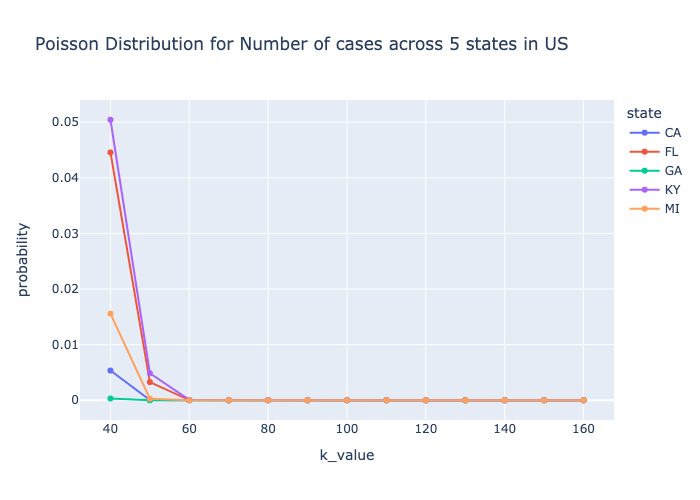

In [295]:
#plot the poisson distribution cases
fig = px.scatter(poisson_data_cases, x="k_value", y="probability", color='state',title='Poisson Distribution for Number of cases across 5 states in US')
fig.update_traces(mode='lines+markers')
#display plot
fig.write_image("graphs/Poisson Distribution for Number of New across 5 states in US.png")
Image(filename="graphs/Poisson Distribution for Number of New across 5 states in US.png")

* The distribution is positive valued in all the states CA,FL,GA,KY,MI
* We can see the state KY is having  positive values and GA has the lowest probablity of covid cases.

#### Calculate the pmf values using poisson distribution: deaths

In [96]:
data_deaths = data[['State', 'deaths (Normalized)']]

In [97]:
# Added a fuction to calculate the k_values and probablity using poisson distribution

k_values = range(12)
states = data_deaths['State']
means = data_deaths['deaths (Normalized)']
columns = ['state','mean','k_value','probability']

data_dict={}
for column in columns:
    data_dict[column]=[]
        
for idx, mean in enumerate(means):
    for k_value in k_values:
        data_dict['state'].append(states[idx])
        data_dict['mean'].append(mean)
        data_dict['k_value'].append(k_value)
        data_dict['probability'].append(stats.poisson.pmf(k=k_value,mu=mean))
poisson_data_deaths=pd.DataFrame.from_dict(data_dict)
poisson_data_deaths.head()

,state,mean,k_value,probability
0,CA,0.275537,0,0.759164
1,CA,0.275537,1,0.209178
2,CA,0.275537,2,0.028818
3,CA,0.275537,3,0.002647
4,CA,0.275537,4,0.000182


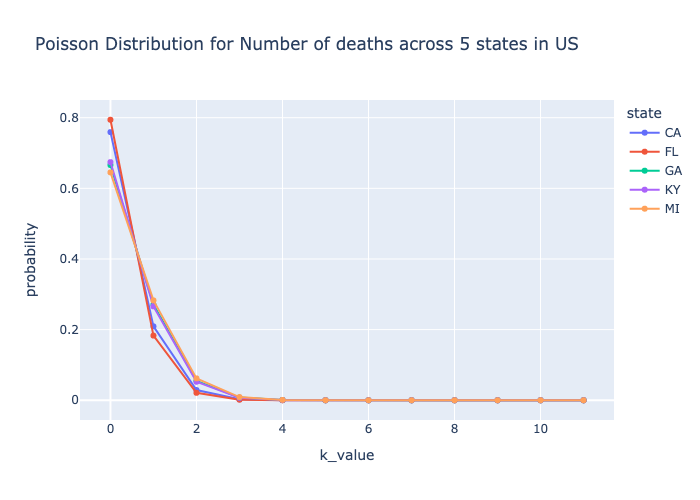

In [294]:
#plot the poisson distribution for deaths
fig = px.scatter(poisson_data_deaths, x="k_value", y="probability", color='state',title='Poisson Distribution for Number of deaths across 5 states in US')
fig.update_traces(mode='lines+markers')
#display plot
fig.write_image("graphs/Poisson Distribution for Number of Death across 5 states in US.png")
Image(filename="graphs/Poisson Distribution for Number of Death across 5 states in US.png")

# Inferences of Poisson distribution in 5 states
* The poisson distribution of 5 states is very similar. Florida state has the highest value and Michigan has lowest value.
* The graph is skewed on the left side and has lower values on the right.
* All states show similar trend.


## Part 3 - Perform corelation between Enrichment data valiables and COVID-19 cases to observe any patterns.

In [206]:
# Read the enrichment dataset for county based employment 

employment_data = pd.read_csv("/Users/aditi/Documents/GitHub/Spring-22_COVID-Team_4/data/stage_1/county-ests-employment-and-wages.csv")


In [214]:
# Converting county_name in employment data to lower case so that it will be easy to map with the superdata.
employment_data['area_title'] = employment_data['area_title'].apply(lambda cn: cn.lower().strip())
employment_data.head()

,year,quarter,area_fips,area_title,quarterly_establishments,month_3_employment,month_3_employment_percent_change_oty,month_3_employment_rank,average_weekly_wages,average_weekly_wages_percent_change_oty,average_weekly_wages_rank,County_Name,State,area_quarter
22518,2020,1,12001,"alachua, fl",7600,134100,0.0,203,986,4.4,62,alachua,fl,"alachua, fl,1"
22519,2020,1,12009,"brevard, fl",16700,223400,1.7,45,1034,6.4,10,brevard,fl,"brevard, fl,1"
22520,2020,1,12011,"broward, fl",73400,822400,0.3,166,1117,2.7,201,broward,fl,"broward, fl,1"
22521,2020,1,12021,"collier, fl",15500,157000,0.3,166,997,4.6,51,collier,fl,"collier, fl,1"
22522,2020,1,12031,"duval, fl",31400,525400,0.7,122,1153,2.3,241,duval,fl,"duval, fl,1"


In [215]:
employment_data = employment_data[employment_data["area_title"] != "united states"]
employment_data.head()

,year,quarter,area_fips,area_title,quarterly_establishments,month_3_employment,month_3_employment_percent_change_oty,month_3_employment_rank,average_weekly_wages,average_weekly_wages_percent_change_oty,average_weekly_wages_rank,County_Name,State,area_quarter
22518,2020,1,12001,"alachua, fl",7600,134100,0.0,203,986,4.4,62,alachua,fl,"alachua, fl,1"
22519,2020,1,12009,"brevard, fl",16700,223400,1.7,45,1034,6.4,10,brevard,fl,"brevard, fl,1"
22520,2020,1,12011,"broward, fl",73400,822400,0.3,166,1117,2.7,201,broward,fl,"broward, fl,1"
22521,2020,1,12021,"collier, fl",15500,157000,0.3,166,997,4.6,51,collier,fl,"collier, fl,1"
22522,2020,1,12031,"duval, fl",31400,525400,0.7,122,1153,2.3,241,duval,fl,"duval, fl,1"


In [231]:
#Filterning 2020 data to match the enrichment data set

employment_data['County_Name'] = employment_data['area_title'].apply(lambda cn: cn.split(", ")[0])
employment_data['State'] = employment_data['area_title'].apply(lambda cn: cn.split(", ")[1])
employment_data = employment_data[employment_data["year"] == 2020]
employment_data.head()

,year,quarter,area_fips,area_title,quarterly_establishments,month_3_employment,month_3_employment_percent_change_oty,month_3_employment_rank,average_weekly_wages,average_weekly_wages_percent_change_oty,average_weekly_wages_rank,County_Name,State,area_quarter
22518,2020,1,12001,"alachua, fl",7600,134100,0.0,203,986,4.4,62,alachua,fl,"alachua, fl,1"
23236,2020,3,12001,"alachua, fl",7500,128200,-4.8,84,1014,7.8,140,alachua,fl,"alachua, fl,3"
23595,2020,4,12001,"alachua, fl",7600,130400,-4.2,97,1122,14.5,69,alachua,fl,"alachua, fl,4"
22877,2020,2,12001,"alachua, fl",7600,124200,-5.5,50,979,5.6,299,alachua,fl,"alachua, fl,2"
23596,2020,4,12009,"brevard, fl",17200,219700,-2.9,54,1159,9.9,295,brevard,fl,"brevard, fl,4"


In [232]:
# Adding new column to be able to use when merge enrichment dataset and superdataset
#merge will be done on quarter and countyname
employment_data = employment_data[employment_data["State"] == "fl"]
employment_data['area_quarter'] = employment_data['area_title'] + "," + employment_data['quarter'].apply(str)
employment_data = employment_data.sort_values('area_quarter')
employment_data


,year,quarter,area_fips,area_title,quarterly_establishments,month_3_employment,month_3_employment_percent_change_oty,month_3_employment_rank,average_weekly_wages,average_weekly_wages_percent_change_oty,average_weekly_wages_rank,County_Name,State,area_quarter
22518,2020,1,12001,"alachua, fl",7600,134100,0.0,203,986,4.4,62,alachua,fl,"alachua, fl,1"
22877,2020,2,12001,"alachua, fl",7600,124200,-5.5,50,979,5.6,299,alachua,fl,"alachua, fl,2"
23236,2020,3,12001,"alachua, fl",7500,128200,-4.8,84,1014,7.8,140,alachua,fl,"alachua, fl,3"
23595,2020,4,12001,"alachua, fl",7600,130400,-4.2,97,1122,14.5,69,alachua,fl,"alachua, fl,4"
22519,2020,1,12009,"brevard, fl",16700,223400,1.7,45,1034,6.4,10,brevard,fl,"brevard, fl,1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23616,2020,4,12111,"st. lucie, fl",7400,81200,-1.5,18,929,9.2,315,st. lucie,fl,"st. lucie, fl,4"
22542,2020,1,12127,"volusia, fl",15400,176600,-0.8,281,817,4.2,76,volusia,fl,"volusia, fl,1"
22901,2020,2,12127,"volusia, fl",15300,160400,-7.0,103,855,8.4,167,volusia,fl,"volusia, fl,2"
23260,2020,3,12127,"volusia, fl",15400,166400,-5.1,102,824,8.9,80,volusia,fl,"volusia, fl,3"


## Using Superdata set to correlate to employment enrichment dataset

In [258]:
#Filter data for all counties of Florida state 

covid_merged_subset = super_dataset[super_dataset["State"].isin(['FL'])]
covid_merged_subset = covid_merged_subset[covid_merged_subset['County_Name'] != 'statewide unallocated']
covid_merged_subset.head()

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population
249161,12001,alachua county,FL,1/22/20,0,0,269043
249162,12001,alachua county,FL,1/23/20,0,0,269043
249163,12001,alachua county,FL,1/24/20,0,0,269043
249164,12001,alachua county,FL,1/25/20,0,0,269043
249165,12001,alachua county,FL,1/26/20,0,0,269043


In [259]:
#Calculate new cases and deaths for selected states by using diff() function
covid_merged_subset['Confirmed'] = covid_merged_subset['Confirmed'].diff()
covid_merged_subset['Deaths'] = covid_merged_subset['Deaths'].diff()
covid_merged_subset.head()

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population
249161,12001,alachua county,FL,1/22/20,NaN,NaN,269043
249162,12001,alachua county,FL,1/23/20,0,0,269043
249163,12001,alachua county,FL,1/24/20,0,0,269043
249164,12001,alachua county,FL,1/25/20,0,0,269043
249165,12001,alachua county,FL,1/26/20,0,0,269043


In [260]:
# Remove first row as we have got NaN value for the diff() function. Conver date to correct format for further analysis.

covid_merged_subset= covid_merged_subset[covid_merged_subset['Date'] != '1/22/20']
covid_merged_subset['Date'] = covid_merged_subset.Date.apply(lambda d: datetime.strptime(d, '%m/%d/%y'))
covid_merged_subset.head()

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population
249162,12001,alachua county,FL,2020-01-23,0,0,269043
249163,12001,alachua county,FL,2020-01-24,0,0,269043
249164,12001,alachua county,FL,2020-01-25,0,0,269043
249165,12001,alachua county,FL,2020-01-26,0,0,269043
249166,12001,alachua county,FL,2020-01-27,0,0,269043


In [261]:
#Filterning 2021 data to match the enrichment data set

covid_merged_subset['Date'] = pd.to_datetime(covid_merged_subset['Date'])
covid_merged_subset = covid_merged_subset[covid_merged_subset['Date'].dt.year == 2020]
covid_merged_subset.head()

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population
249162,12001,alachua county,FL,2020-01-23,0,0,269043
249163,12001,alachua county,FL,2020-01-24,0,0,269043
249164,12001,alachua county,FL,2020-01-25,0,0,269043
249165,12001,alachua county,FL,2020-01-26,0,0,269043
249166,12001,alachua county,FL,2020-01-27,0,0,269043


In [262]:
# converted the dates to Quarter to be able to merge with enrichment data

import datetime as dt
covid_merged_subset['Date'] = pd.to_datetime(covid_merged_subset['Date']) 
covid_merged_subset['quarter'] = covid_merged_subset['Date'].dt.quarter

covid_merged_subset.head()

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,quarter
249162,12001,alachua county,FL,2020-01-23,0,0,269043,1
249163,12001,alachua county,FL,2020-01-24,0,0,269043,1
249164,12001,alachua county,FL,2020-01-25,0,0,269043,1
249165,12001,alachua county,FL,2020-01-26,0,0,269043,1
249166,12001,alachua county,FL,2020-01-27,0,0,269043,1


In [263]:
#Remove the whitespace from the CountyName

covid_merged_subset = covid_merged_subset[super_dataset['County_Name'].notnull()]
covid_merged_subset['County_Name'] = covid_merged_subset['County_Name'].apply(lambda cn: cn.split(" ")[0])
covid_merged_subset.head()

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,quarter
249162,12001,alachua,FL,2020-01-23,0,0,269043,1
249163,12001,alachua,FL,2020-01-24,0,0,269043,1
249164,12001,alachua,FL,2020-01-25,0,0,269043,1
249165,12001,alachua,FL,2020-01-26,0,0,269043,1
249166,12001,alachua,FL,2020-01-27,0,0,269043,1


In [264]:
#Add new coulmn area_title to map to enrichment dataset

covid_merged_subset = covid_merged_subset[super_dataset['State'].notnull()]
covid_merged_subset['area_title'] = covid_merged_subset['County_Name'].str.strip() + ", " + covid_merged_subset['State'].apply(lambda cn: cn.lower().strip())  
covid_merged_subset.head()

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,quarter,area_title
249162,12001,alachua,FL,2020-01-23,0,0,269043,1,"alachua, fl"
249163,12001,alachua,FL,2020-01-24,0,0,269043,1,"alachua, fl"
249164,12001,alachua,FL,2020-01-25,0,0,269043,1,"alachua, fl"
249165,12001,alachua,FL,2020-01-26,0,0,269043,1,"alachua, fl"
249166,12001,alachua,FL,2020-01-27,0,0,269043,1,"alachua, fl"


In [265]:
#Add new coulmn area_quarter to create mapping column to merge super dataset and enrichment dataset

covid_merged_subset['area_quarter'] = covid_merged_subset['area_title'] + "," + covid_merged_subset['quarter'].apply(str)
covid_merged_subset.head()


,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,quarter,area_title,area_quarter
249162,12001,alachua,FL,2020-01-23,0,0,269043,1,"alachua, fl","alachua, fl,1"
249163,12001,alachua,FL,2020-01-24,0,0,269043,1,"alachua, fl","alachua, fl,1"
249164,12001,alachua,FL,2020-01-25,0,0,269043,1,"alachua, fl","alachua, fl,1"
249165,12001,alachua,FL,2020-01-26,0,0,269043,1,"alachua, fl","alachua, fl,1"
249166,12001,alachua,FL,2020-01-27,0,0,269043,1,"alachua, fl","alachua, fl,1"


In [268]:
covid_merged_subset = covid_merged_subset[['Confirmed','Deaths','area_quarter']]
covid_merged_subset.head()

,Confirmed,Deaths,area_quarter
249162,0,0,"alachua, fl,1"
249163,0,0,"alachua, fl,1"
249164,0,0,"alachua, fl,1"
249165,0,0,"alachua, fl,1"
249166,0,0,"alachua, fl,1"


In [282]:
#group by state and compute sum of each column for each state

covid_merged_subset = covid_merged_subset.groupby(["area_quarter"]).sum().reset_index()
covid_merged_subset


,area_quarter,Confirmed,Deaths
0,"alachua, fl,1",87,0
1,"alachua, fl,2",1110,12
2,"alachua, fl,3",7096,48
3,"alachua, fl,4",7573,69
4,"baker, fl,1",9,0
...,...,...,...
259,"walton, fl,4",2914,23
260,"washington, fl,1",1,0
261,"washington, fl,2",111,12
262,"washington, fl,3",972,10


In [283]:
#Merge superdata set and enrichment data set. The data is filtered for quarterwise details. 

mergedDf = covid_merged_subset.merge(employment_data, on='area_quarter')
mergedDf.head()

,area_quarter,Confirmed,Deaths,year,quarter,area_fips,area_title,quarterly_establishments,month_3_employment,month_3_employment_percent_change_oty,month_3_employment_rank,average_weekly_wages,average_weekly_wages_percent_change_oty,average_weekly_wages_rank,County_Name,State
0,"alachua, fl,1",87,0,2020,1,12001,"alachua, fl",7600,134100,0.0,203,986,4.4,62,alachua,fl
1,"alachua, fl,2",1110,12,2020,2,12001,"alachua, fl",7600,124200,-5.5,50,979,5.6,299,alachua,fl
2,"alachua, fl,3",7096,48,2020,3,12001,"alachua, fl",7500,128200,-4.8,84,1014,7.8,140,alachua,fl
3,"alachua, fl,4",7573,69,2020,4,12001,"alachua, fl",7600,130400,-4.2,97,1122,14.5,69,alachua,fl
4,"brevard, fl,1",37,0,2020,1,12009,"brevard, fl",16700,223400,1.7,45,1034,6.4,10,brevard,fl


In [292]:
#remove unneeded columns
flmergedDf = mergedDf[['quarter','County_Name', 'Confirmed','Deaths','month_3_employment','month_3_employment_percent_change_oty']]
flmergedDf["employment"] = flmergedDf["month_3_employment"].astype('int64')
flmergedDf

,quarter,County_Name,Confirmed,Deaths,month_3_employment,month_3_employment_percent_change_oty,employment
0,1,alachua,87,0,134100,0.0,134100
1,2,alachua,1110,12,124200,-5.5,124200
2,3,alachua,7096,48,128200,-4.8,128200
3,4,alachua,7573,69,130400,-4.2,130400
4,1,brevard,37,0,223400,1.7,223400
...,...,...,...,...,...,...,...
83,4,seminole,8986,100,196700,-4.1,196700
84,1,volusia,80,1,176600,-0.8,176600
85,2,volusia,2025,56,160400,-7.0,160400
86,3,volusia,8840,192,166400,-5.1,166400


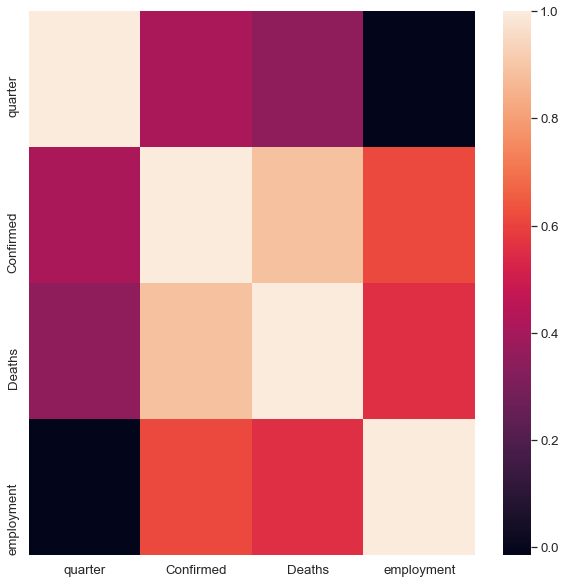

In [293]:
corr=flmergedDf.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corr)
plt.show()

#### Hypothesis

Based on above correlation of Covid new/death cases and employment data for year 2020 across all 4 quarters, we can form below hyposthesis
* The employment rate decreased from 2020 1st quester to 4th quarter as number of COVID cases increased in Florida county.
* The correlation is very evident that the number of confirmed and deaths cases impacted the employment numbers across Florida state.
* The enrichment data has quarterly data of employment rate changes. We can clearly see the negative rate of employment in the 4th quarter of year 2020.
* The first quarter of 2020 has shown good employment rate as COVID only started impacting from end of Quarter 1.